In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/scratch/user/xiliangdiao/Low/B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.AICE.185001.210012.nc')

In [3]:
plotvar = data.variables['aice'][8:3000:12,:,:]
lont = data.variables['TLON'][:,:]
latt = data.variables['TLAT'][:,:]

In [4]:
plotvar[plotvar>100] = np.nan
plotvar[plotvar<0] = np.nan

In [5]:
plotvarone = plotvar[:,:,0]
lontone = lont[:,0]
lattone = latt[:,0]

In [6]:
plot = np.ones([250,384,321])
ln = np.ones([384,321])
lt = np.ones([384,321])

In [7]:
plot[:,:,:320]=plotvar
plot[:,:,320]=plotvarone
ln[:,:320]=lont
ln[:,320]=lontone
lt[:,:320]=latt
lt[:,320]=lattone

In [19]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
#nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
nice_levels = [85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#################################################################


/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


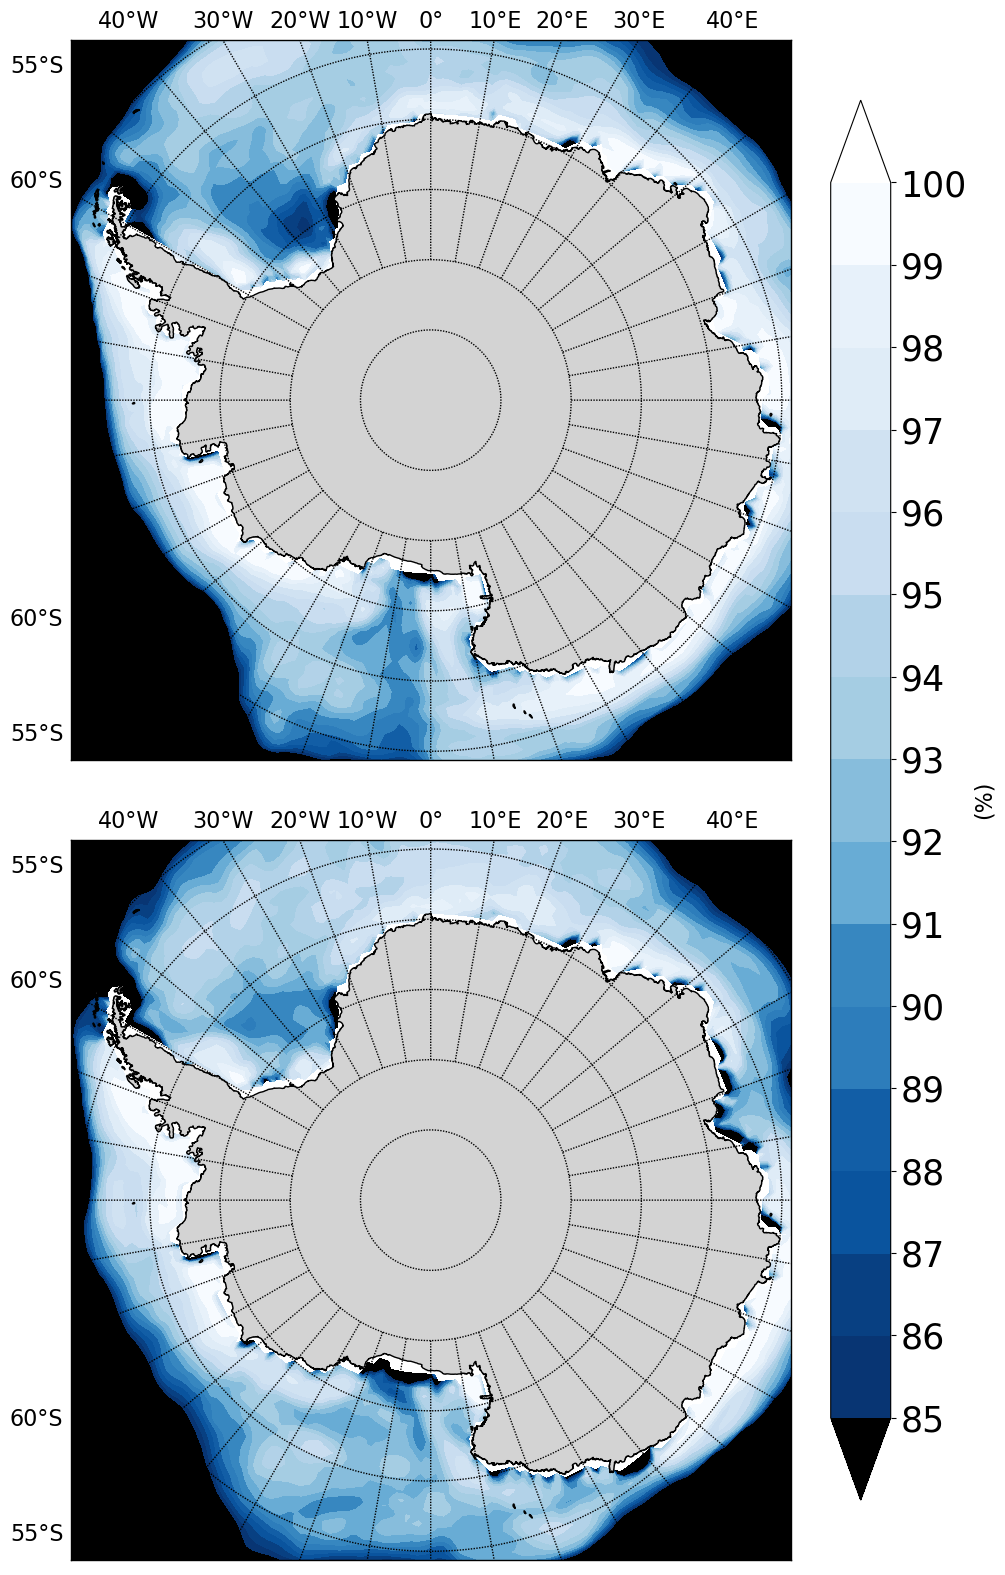

In [22]:
fig = plt.figure(figsize=(20,20), dpi=100)
ax0 = fig.add_axes([0.1, 0.5, 0.8, 0.36],
                    xticklabels=[])
my_font = {'fontname':'Cambria', 'size':'16'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 5700000,height = 5700000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(ln,lt)
CP = map.contourf(x[:,:],y[:,:],plot[0,:,:],range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels,extend='both')
CP.cmap.set_over('white')
CP.cmap.set_under('black')
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)


#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

#cbar =map.colorbar(CP,ticks = nice_levels)
#cbar.ax.tick_params(labelsize=25) 
#cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
#plt.xlabel("Year 1850-1860 averaged September Sea Ice concentration",**my_font)
ax0.text(0.02, 0.05, '(a)', transform=ax0.transAxes,size=36, weight='bold')

l = 0.70
b = 0.13
w = 0.03
h = 0.70
#############
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
cbar = fig.colorbar(CP, cax = cbar_ax,ticks=nice_levels,extendfrac='auto')
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=25)
cbar.set_label('(%)', **my_font)

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.36],
                    xticklabels=[])
my_font = {'fontname':'Cambria', 'size':'16'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 5700000,height = 5700000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(ln,lt)
CP = map.contourf(x[:,:],y[:,:],plot[10,:,:],range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels,extend='both')
CP.cmap.set_over('white')
CP.cmap.set_under('black')
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)

#map.plot(x4,y4,'red',linewidth=5)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

#cbar =map.colorbar(CP,ticks = nice_levels)
#cbar.ax.tick_params(labelsize=25) 
#cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
#plt.xlabel("Year 1850-1860 averaged September Sea Ice concentration",**my_font)
ax1.text(0.02, 0.05, '(b)', transform=ax1.transAxes,size=36, weight='bold')
plt.savefig("ice30009LR.png",bbox_inches='tight')